In [15]:
import os
import pandas as pd
import numpy as np
E09=pd.read_csv('FinalE09.txt')
E10=pd.read_csv('FinalE10.txt')
E11=pd.read_csv('FinalE11.txt')
E12=pd.read_csv('FinalE12.txt')
E13=pd.read_csv('FinalE13.txt')
E14=pd.read_csv('FinalE14.txt')
AP=pd.read_csv('finalAP.txt')
print(E09.shape)
print(AP.shape)

(18, 9)
(18, 3)


In [16]:
keep_col = [
    "Mean Scale Score",
    "Percentage Advanced",
    "Percentage Proficient",
    "Percentage Basic",
    "Percentage Below Basic",
    "Percentage Far Below Basic"]
t09=list(E09)
for x in range(len(t09)):
    if t09[x] in keep_col:
        pass
    else:
        E09.drop(t09[x],inplace=True,axis=1)
t10=list(E10)
for x in range(len(t10)):
    if t10[x] in keep_col:
        pass
    else:
        E10.drop(t10[x],inplace=True,axis=1)
t11=list(E11)
for x in range(len(t11)):
    if t11[x] in keep_col:
        pass
    else:
        E11.drop(t11[x],inplace=True,axis=1)
t12=list(E12)
for x in range(len(t12)):
    if t12[x] in keep_col:
        pass
    else:
        E12.drop(t12[x],inplace=True,axis=1)
        
t13=list(E13)
for x in range(len(t13)):
    if t13[x] in keep_col:
        pass
    else:
        E13.drop(t13[x],inplace=True,axis=1)
t14=list(E14)
for x in range(len(t14)):
    if t14[x] in keep_col:
        pass
    else:
        E14.drop(t14[x],inplace=True,axis=1)
tap=list(AP)
AP.drop(tap[0],inplace=True,axis=1)
AP.drop(tap[1],inplace=True,axis=1)
print(AP.shape)
print(E09.shape)

(18, 1)
(18, 6)


In [22]:
Elementary=[]
e09=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e09[j,i]=E09.iat[j,i]
Elementary.append(e09)

e10=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e10[j,i]=E10.iat[j,i]
Elementary.append(e10)

e11=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e11[j,i]=E11.iat[j,i]
Elementary.append(e11)

e12=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e12[j,i]=E12.iat[j,i]
Elementary.append(e12)

e13=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e13[j,i]=E13.iat[j,i]
Elementary.append(e13)

e14=np.zeros((18,6))
for i in range(6):
    for j in range(18):
        e14[j,i]=E14.iat[j,i]
Elementary.append(e14)
ap=[]
for i in range(18):
    ap.append(AP.iat[i,0])
print(len(ap))
print(len(Elementary))

18
6


In [56]:
from numpy.linalg import inv
X=np.zeros((18,7))
for i in range(18):
    X[i,0]=1
    X[i,1]=Elementary[5][i,0]
    X[i,2]=Elementary[5][i,1]
    X[i,3]=Elementary[5][i,2]
    X[i,4]=Elementary[5][i,3]
    X[i,5]=Elementary[5][i,4]
    X[i,6]=Elementary[5][i,5]
Y=np.zeros((18,1))
for i in range(18):
    Y[i,0]=ap[i]
Theta=np.matmul(np.matmul(inv(np.matmul(X.T,X)),X.T),Y)
print(Theta)

[[ 53.51269199]
 [  0.0651183 ]
 [ -0.82675006]
 [ -0.75219442]
 [ -0.77070775]
 [ -0.64725335]
 [ -0.71081299]]


Average Error is: 
0.252576691706


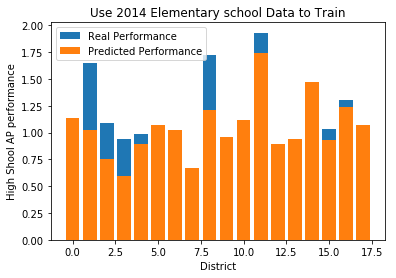

In [57]:
Predict_result=np.zeros((18,1))
for i in range(18):
    Predict_result[i,0]=(np.matmul(np.reshape(Theta,(1,7)),np.reshape(X[i,:],(7,1))))
MSE=0
for i in range(18):
    MSE+=np.abs(Y[i,0]-Predict_result[i,0])
MSE=MSE/18
print('Average Error is: ')
print(MSE)
import matplotlib.pyplot as plt
y_pos = np.arange(18)
plt.bar(y_pos,np.reshape(Y,(18,)))
plt.bar(y_pos,np.reshape(Predict_result,(18,)))
plt.legend(['Real Performance','Predicted Performance'])
plt.ylabel('High Shool AP performance')
plt.xlabel('District')
plt.title('Use 2014 Elementary school Data to Train')
plt.show()